# Import packages

In [ ]:
from src.utils import read_gtf, collapse_isoforms_to_proteoforms
import src.plotting_functions as plotting
import polars as pl
from importlib import reload
import matplotlib.pyplot as plt
import seaborn as sns
from src.ryp import r, to_r

: 

# Load datasets

In [3]:
orfanage_gtf = read_gtf("nextflow_results/V47/orfanage/orfanage.gtf")

In [4]:
print(f"There are {orfanage_gtf.unique("transcript_id").shape[0]} transcripts that contain CDS predicted by ORFanage")

There are 173897 transcripts that contain CDS predicted by ORFanage


In [5]:
isoforms_to_proteoforms = collapse_isoforms_to_proteoforms(orfanage_gtf)

/gpfs/fs0/scratch/s/shreejoy/nxu/SFARI/src/utils.py:7013: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  .with_columns(


In [6]:
f"There are {isoforms_to_proteoforms.unique("base_isoform").shape[0]} unique ORFs."

'There are 88404 unique ORFs.'

In [7]:
protein_classification = pl.read_csv("nextflow_results/V47/orfanage/SFARI.protein_classification.tsv", separator="\t")

In [10]:
n_novel_proteins = protein_classification\
    .rename({"pb": "isoform"})\
    .join(isoforms_to_proteoforms, on="isoform")\
    .unique("base_isoform")\
    .filter(
        pl.col("protein_classification_base").is_in(["pNNC", "pNIC"])
    ).shape[0]

print(f"There are {n_novel_proteins} unique novel proteoforms")

There are 57460 unique novel proteoforms


# Protein classification histogram

In [22]:
reload(plotting)

<module 'src.plotting_functions' from '/gpfs/fs0/scratch/s/shreejoy/nxu/SFARI/src/plotting_functions.py'>

/gpfs/fs0/scratch/s/shreejoy/nxu/SFARI/src/utils.py:7013: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  .with_columns(


null device 
          1 


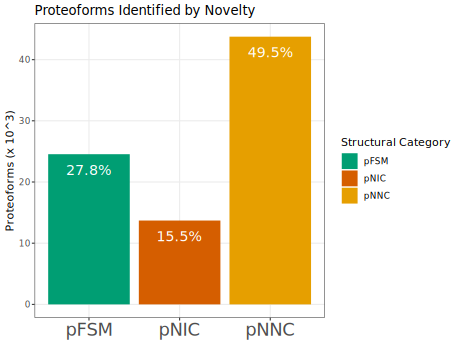

In [23]:
plotting.plot_protein_class_hist(protein_classification, orfanage_gtf, "figures/figure_2/protein_class.pdf")

# Peptides

In [4]:
annot_peptides_hybrid = read_gtf("nextflow_results/V47/orfanage/annot_peptides_hybrid.gtf", attributes=["gene_name", "transcript_id", "detected", "type", "novelty"])

In [8]:
annot_peptides_hybrid.unique("transcript_id")\
    .filter(
        pl.col("detected") == "True"
    )

seqname,source,feature,start,end,score,strand,frame,attributes,gene_name,transcript_id,detected,type,novelty
str,str,str,i64,i64,str,str,str,str,str,str,str,str,str
"""chr8""","""hg38_canon""","""exon""",73981457,73981483,"""NA""","""+""","""NA""","""gene_id ""file3_26477_2_1""; tra…","""TMEM70""","""K.HVFTTFYAK.T(TMEM70)""","""True""","""mono-exonic""","""known"""
"""chr1""","""hg38_canon""","""exon""",202964612,202964636,"""NA""","""-""","""NA""","""gene_id ""file11_64121_3_1""; tr…","""CYB5R1""","""K.LGMIAGGTGITPMLQLIR.A(CYB5R1)""","""True""","""splice-junction""","""known"""
"""chr11""","""hg38_canon""","""exon""",93790610,93790642,"""NA""","""+""","""NA""","""gene_id ""file1_60264_2_1""; tra…","""ENSG00000284057""","""K.SLAGAAQILLK.G(ENSG0000028405…","""True""","""mono-exonic""","""known"""
"""chr1""","""hg38_canon""","""exon""",42683444,42683466,"""NA""","""+""","""NA""","""gene_id ""file3_13858_3_1""; tra…","""YBX1""","""R.NGYGFINRNDTK.E(YBX1)""","""True""","""splice-junction""","""known"""
"""chrX""","""hg38_canon""","""exon""",38369820,38369843,"""NA""","""+""","""NA""","""gene_id ""file8_8496_3_2""; tran…","""OTC_chrX""","""K.SLGMIFEK.R(OTC_chrX)""","""True""","""mono-exonic""","""known"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""chr8""","""hg38_canon""","""exon""",96256975,96257007,"""NA""","""-""","""NA""","""gene_id ""file3_11779_3_1""; tra…","""MTERF3_UQCRB""","""R.DYVDHSETLQK.L(MTERF3_UQCRB)""","""True""","""mono-exonic""","""known"""
"""chr1""","""hg38_canon""","""exon""",155917523,155917549,"""NA""","""-""","""NA""","""gene_id ""file11_19250_2_1""; tr…","""KHDC4""","""R.FTEELPDER.E(KHDC4)""","""True""","""mono-exonic""","""known"""
"""chr14""","""hg38_canon""","""exon""",91283432,91283461,"""NA""","""-""","""NA""","""gene_id ""file8_5738_2_1""; tran…","""CCDC88C""","""R.TDASTDLAMR.S(CCDC88C)""","""True""","""mono-exonic""","""known"""


In [9]:
annot_peptides_hybrid.unique("transcript_id")\
    .filter(
        pl.col("detected") == "False"
    )

seqname,source,feature,start,end,score,strand,frame,attributes,gene_name,transcript_id,detected,type,novelty
str,str,str,i64,i64,str,str,str,str,str,str,str,str,str
"""chr10""","""hg38_canon""","""exon""",11501101,11501130,"""NA""","""-""","""NA""","""gene_id ""file3_38514_4_5""; tra…","""USP6NL""","""K.MKEETRDLYSK.L(USP6NL)""","""False""","""splice-junction""","""known"""
"""chr10""","""hg38_canon""","""exon""",28535722,28535757,"""NA""","""+""","""NA""","""gene_id ""file12_78170_3_2""; tr…","""WAC""","""K.MCILTELERGMVGPVTLHKK.I(WAC)""","""False""","""splice-junction""","""known"""
"""chr20""","""hg38_canon""","""exon""",35411940,35411945,"""NA""","""-""","""NA""","""gene_id ""file5_70056_4_3""; tra…","""UQCC1""","""R.VLRNQTSISQWVPVCSRLIPVSPTQGQG…","""False""","""splice-junction""","""known"""
"""chr16""","""hg38_canon""","""exon""",74626421,74626531,"""NA""","""-""","""NA""","""gene_id ""file2_58673_5_4""; tra…","""RFWD3""","""R.SVLMEMSYRLDDTGNPICSCQPVHTFFG…","""False""","""mono-exonic""","""known"""
"""chr4""","""hg38_canon""","""exon""",121951466,121951512,"""NA""","""-""","""NA""","""gene_id ""file6_55439_3_4""; tra…","""TRPC3""","""R.EPHGYCPPPFSHGPDLSMEGSPSLR.R(…","""False""","""splice-junction""","""known"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""chr6""","""hg38_canon""","""exon""",167925023,167925055,"""NA""","""+""","""NA""","""gene_id ""file11_69664_3_5""; tr…","""AFDN""","""K.EPEIITVTLKK.Q(AFDN)""","""False""","""mono-exonic""","""known"""
"""chr4""","""hg38_canon""","""exon""",70762572,70762616,"""NA""","""+""","""NA""","""gene_id ""file5_6437_4_1""; tran…","""RUFY3_UTP3""","""K.LSIKGLIESALNLGR.T(RUFY3_UTP3…","""False""","""mono-exonic""","""known"""
"""chr17""","""hg38_canon""","""exon""",11651087,11651110,"""NA""","""+""","""NA""","""gene_id ""file10_26911_2_2""; tr…","""DNAH9""","""K.EMSYLEPR.E(DNAH9)""","""False""","""mono-exonic""","""known"""


Text(0.5, 0, '')

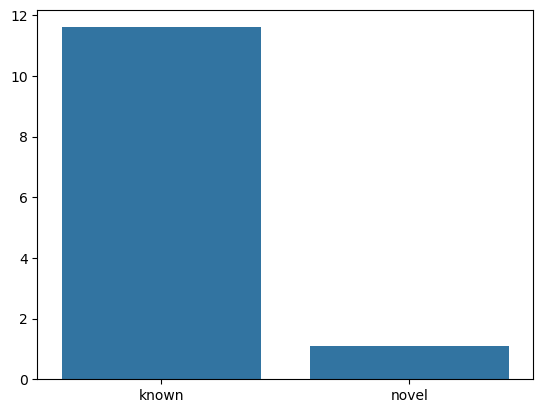

In [18]:
known = annot_peptides_hybrid\
    .filter(
        pl.col("novelty") == "known"
    )\
    .group_by("detected")\
    .len()\
    .with_columns(
        (pl.col("len") / pl.sum("len")).alias("percent")*100,
        type = pl.lit("known")
    )\
    .filter(
        pl.col("detected") == "True"
    )

novel = annot_peptides_hybrid\
    .filter(
        pl.col("novelty") == "novel"
    )\
    .group_by("detected")\
    .len()\
    .with_columns(
        (pl.col("len") / pl.sum("len")).alias("percent")*100,
        type = pl.lit("novel")
    )\
    .filter(
        pl.col("detected") == "True"
    )

df = pl.concat([known, novel], how = "vertical")

fig, ax = plt.subplots()
sns.barplot(data=df.to_pandas(), x="type", y="percent", ax = ax)
ax.set_ylabel("")
ax.set_xlabel("")

# Percentage of protein isoforms validated by peptides in each category

In [1]:
base_isoform = collapse_isoforms_to_proteoforms(orfanage_gtf)

classification = pl.read_parquet("nextflow_results/V47/final_classification.parquet")\
    .select(["isoform", "structural_category", "containing_novel_spl"])\
    .join(
        base_isoform.rename({"transcript_id": "isoform"}),
        on = "isoform",
        how = "left"
    )\
    .drop_nulls()\
    .unique("base_isoform")

protein_classification =pl.read_csv("nextflow_results/V47/orfanage/SFARI.protein_classification.tsv", separator = "\t")
structural_category_labels = {"full-splice_match": "FSM", "incomplete-splice_match": "ISM", "novel_in_catalog": "NIC", "novel_not_in_catalog": "NNC", "Other": "Other"}
classification = classification\
    .with_columns(
        structural_category2 = pl.when(pl.col("structural_category").is_in(["full-splice_match", "incomplete-splice_match", "novel_in_catalog", "novel_not_in_catalog"]))\
            .then(pl.col("structural_category"))\
            .otherwise(pl.lit("Other"))
    )\
    .with_columns(
        structural_category2 = pl.col("structural_category2").map_elements(lambda x: structural_category_labels[x])
    )\
    .join(
        protein_classification["pb", "protein_classification_base"].rename({"pb": "isoform"}),
        on = "isoform",
        how = "left"
    )\
    .drop_nulls()

NameError: name 'collapse_isoforms_to_proteoforms' is not defined

null device 
          1 


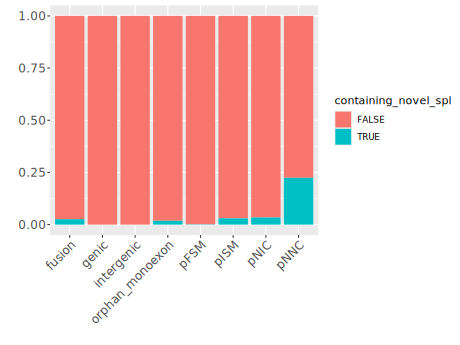

In [56]:
to_r(classification, "df")

r(
"""
df %>% 
    ggplot(aes(x=protein_classification_base, fill=containing_novel_spl)) +
    stat_count(position=position_fill()) +
    theme(axis.text.x = element_text(size = 8)) +
    theme(
        axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1, size = 12),
        axis.text.y = element_text(size = 12)
    ) +
    labs(x = "", y = "")
"""
)